# Explore here

In [45]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Planteamiento del problema y recolección de la data

Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

Variable a predecir (anycondition_prevalence)

In [3]:
# Lectura y guardado data
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
df_dh = pd.read_csv(url)

# Ruta de destino
ruta_destino = '/workspace/Modelo-de-regresion-lineal-usando-pandas-y-python/data/raw/demographic_health_data.csv'

# Crear el directorio si no existe
os.makedirs(os.path.dirname(ruta_destino), exist_ok=True)

# Guardar el DataFrame en la ruta especificada con una copia de la data original
df_dh.to_csv(ruta_destino, index=False)

print(f'Archivo guardado en: {ruta_destino}')

Archivo guardado en: /workspace/Modelo-de-regresion-lineal-usando-pandas-y-python/data/raw/demographic_health_data.csv


In [4]:
df_dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
df_dh.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [6]:
df_dh.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

### Exploración y limpieza de los Datos

In [7]:
# Valores Nulos
df_dh.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [11]:
cols=df_dh.columns
print(type(cols))
i=0
for col in range(len(cols)):
    print(cols[col])
    i+=1
print(i)

<class 'pandas.core.indexes.base.Index'>
fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
P

In [12]:
df_dh['anycondition_prevalence'].describe()

count    3140.000000
mean       46.793917
std         6.379448
min        22.000000
25%        42.900000
50%        47.200000
75%        51.000000
max        66.200000
Name: anycondition_prevalence, dtype: float64

Seleccionamos las Variables a utilizar 

In [8]:
var_sel_x=["Percent of adults with a bachelor's degree or higher 2014-18","R_death_2018","PCTPOVALL_2018",
          "Med_HH_Income_Percent_of_State_Total_2018", "Unemployment_rate_2018",
          "Active Primary Care Physicians per 100000 Population 2018 (AAMC)","anycondition_prevalence"]
y=df_dh['anycondition_prevalence']

In [10]:
data_sel=df_dh[var_sel_x]
data_sel.head()

,Percent of adults with a bachelor's degree or higher 2014-18,R_death_2018,PCTPOVALL_2018,Med_HH_Income_Percent_of_State_Total_2018,Unemployment_rate_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC),anycondition_prevalence
0,27.7,9.6,13.8,119.0,3.6,77.2,47.6
1,31.3,10.3,9.8,115.5,3.6,77.2,40.2
2,12.2,12.9,30.9,68.9,5.2,77.2,57.5
3,11.5,11.4,21.8,92.3,4.0,77.2,51.6
4,12.6,11.4,13.2,101.1,3.5,77.2,46.3


In [13]:
data_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Percent of adults with a bachelor's degree or higher 2014-18      3140 non-null   float64
 1   R_death_2018                                                      3140 non-null   float64
 2   PCTPOVALL_2018                                                    3140 non-null   float64
 3   Med_HH_Income_Percent_of_State_Total_2018                         3140 non-null   float64
 4   Unemployment_rate_2018                                            3140 non-null   float64
 5   Active Primary Care Physicians per 100000 Population 2018 (AAMC)  3140 non-null   float64
 6   anycondition_prevalence                                           3140 non-null   float64
dtypes: float64(7)
memory usage: 171.8 

### Análisis de variables univariante

Variables numericas

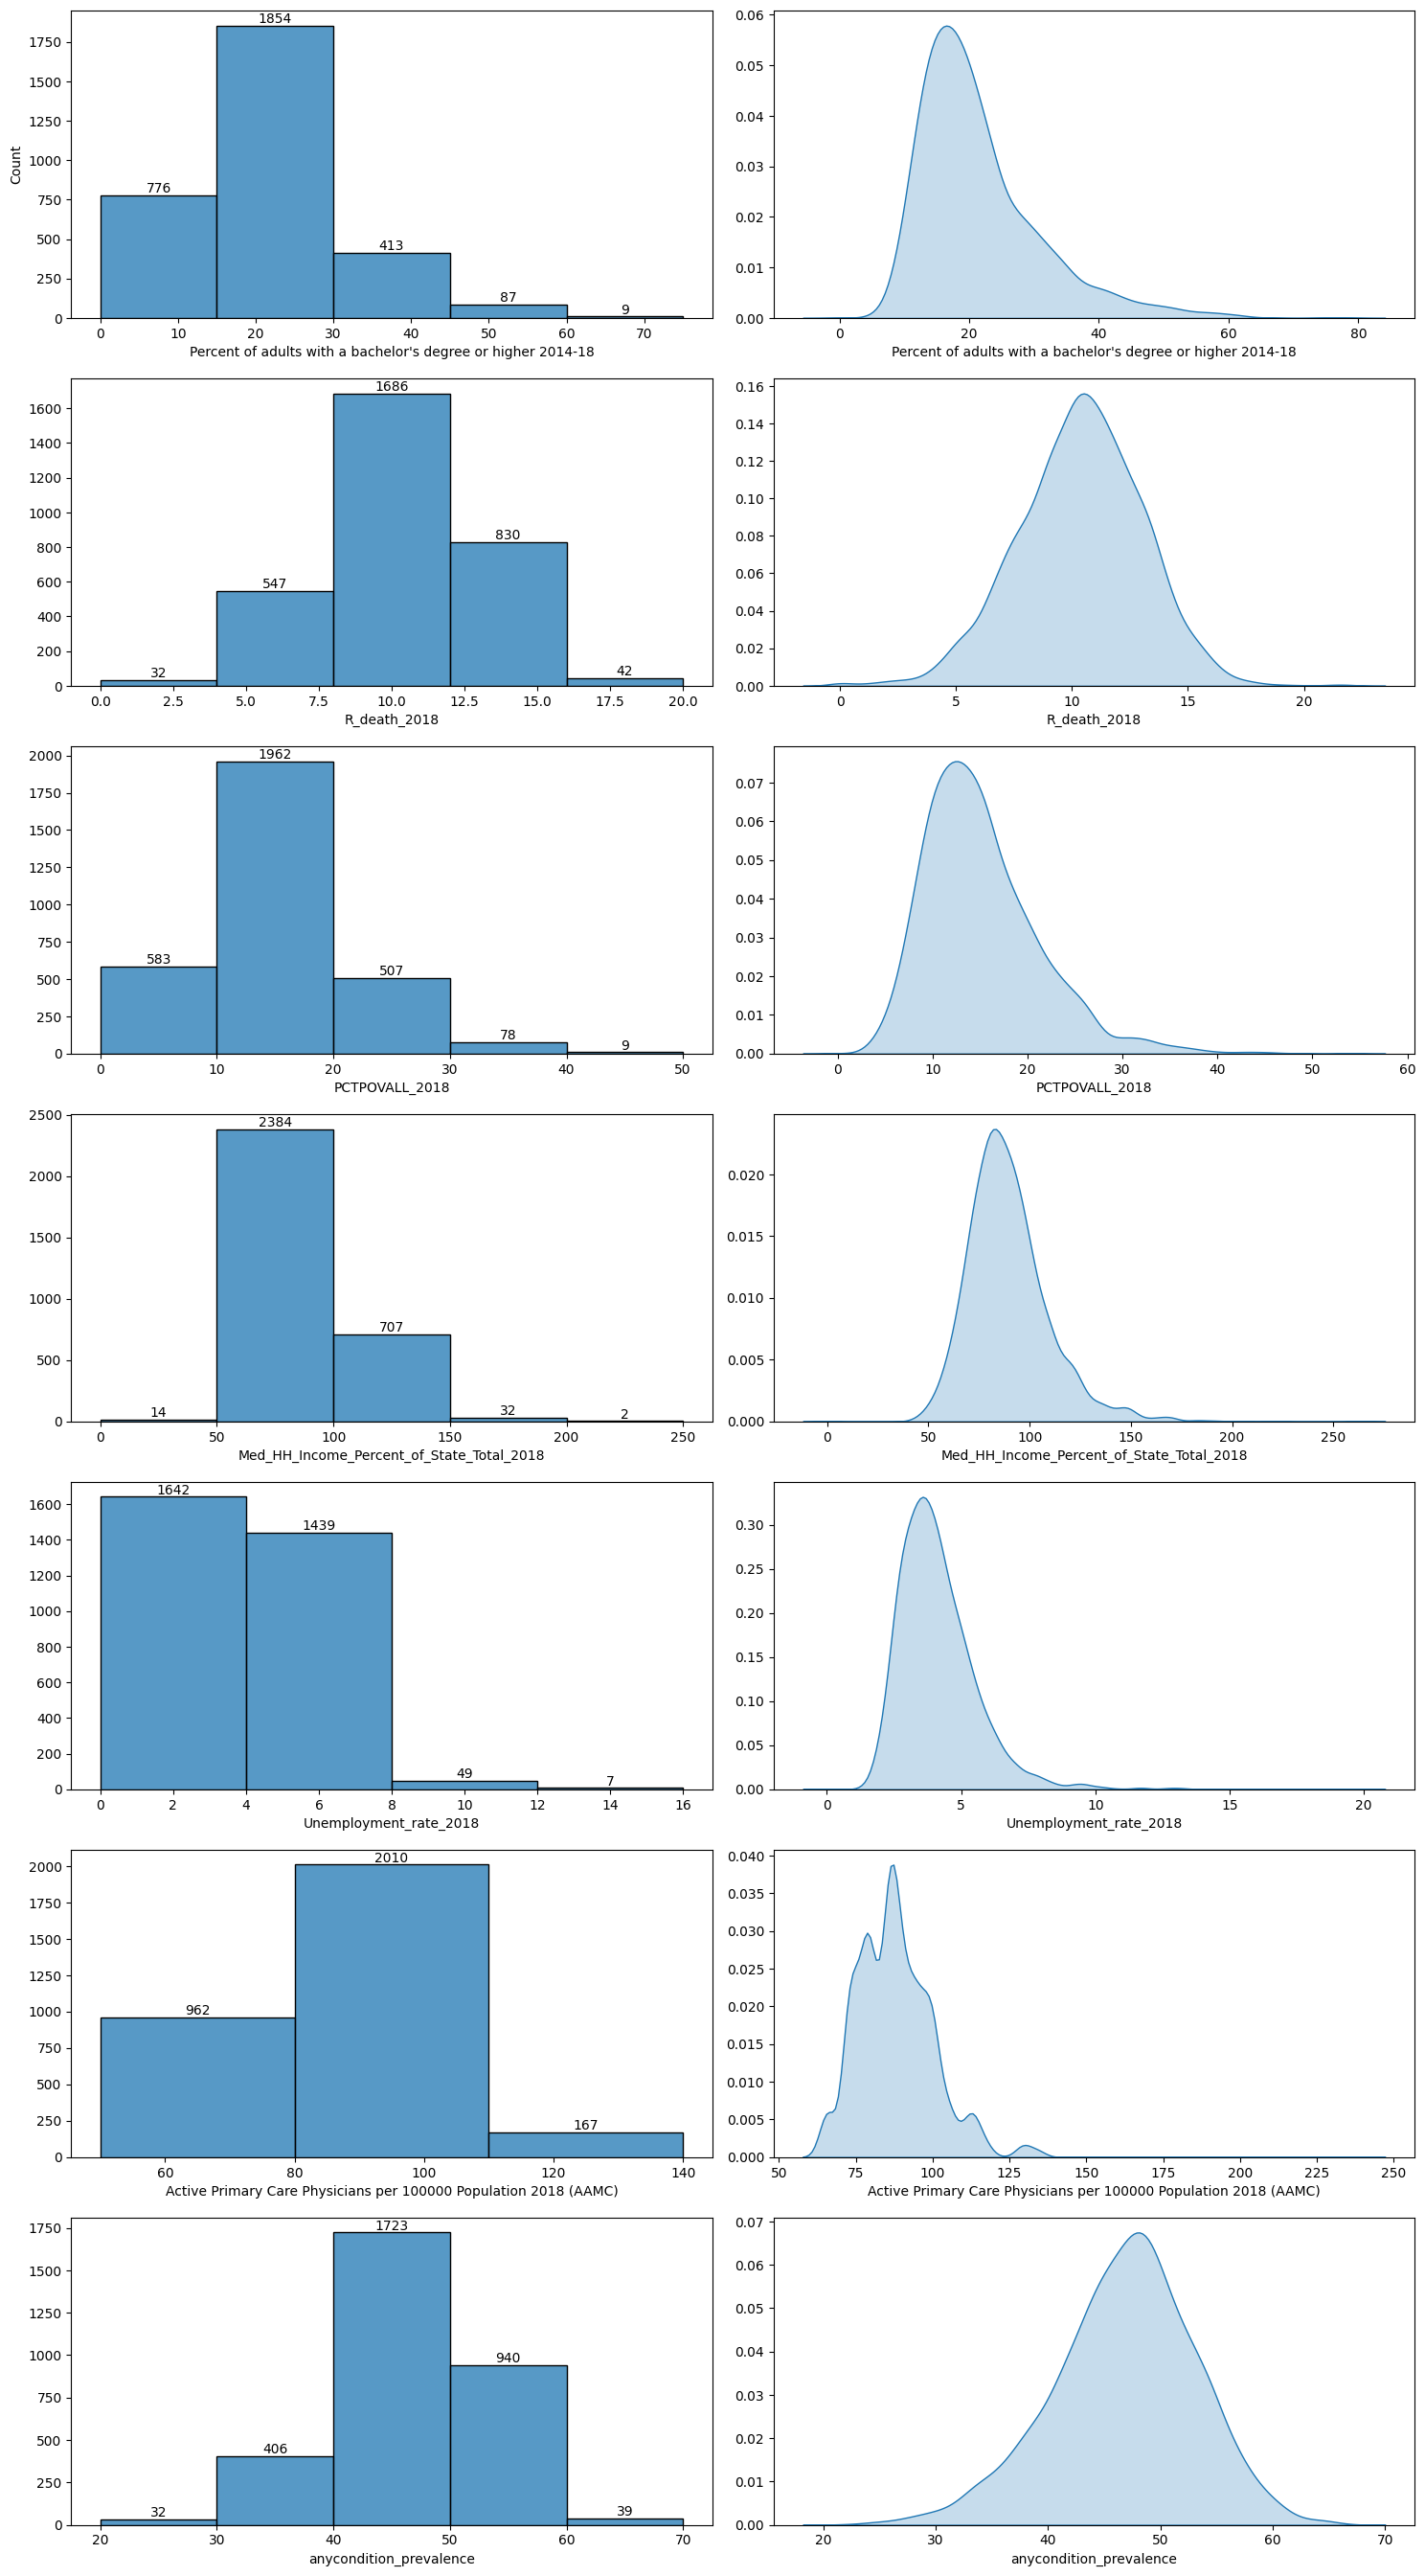

In [16]:
fig, axis = plt.subplots(7,2, figsize = (15, 27))

# Crear un histograma múltiple
sns.histplot(ax = axis[0,0], bins=(0,15,30,45,60,75), data = data_sel, x = "Percent of adults with a bachelor's degree or higher 2014-18")
axis[0,0].bar_label(axis[0,0].containers[0])
sns.kdeplot(ax = axis[0,1], data = df_dh["Percent of adults with a bachelor's degree or higher 2014-18"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[1,0], bins=(0,4,8,12,16,20), data = data_sel, x = "R_death_2018").set(ylabel = None)
axis[1,0].bar_label(axis[1,0].containers[0])
sns.kdeplot(ax = axis[1,1], data = df_dh["R_death_2018"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[2,0], bins=(0,10,20,30,40,50), data = data_sel, x = "PCTPOVALL_2018").set(ylabel = None)
axis[2,0].bar_label(axis[2,0].containers[0])
sns.kdeplot(ax = axis[2,1], data = df_dh["PCTPOVALL_2018"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[3,0],bins=(0,50,100,150,200,250), data = data_sel, x = "Med_HH_Income_Percent_of_State_Total_2018").set(ylabel = None)
axis[3,0].bar_label(axis[3,0].containers[0])
sns.kdeplot(ax = axis[3,1], data = df_dh["Med_HH_Income_Percent_of_State_Total_2018"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[4,0], bins=(0,4,8,12,16), data = data_sel, x = "Unemployment_rate_2018").set(ylabel = None)
axis[4,0].bar_label(axis[4,0].containers[0])
sns.kdeplot(ax = axis[4,1], data = df_dh["Unemployment_rate_2018"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[5,0], bins=(50,80,110,140), data = data_sel, x='Active Primary Care Physicians per 100000 Population 2018 (AAMC)').set(ylabel = None)
axis[5,0].bar_label(axis[5,0].containers[0])
sns.kdeplot(ax = axis[5,1], data = df_dh["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[6,0], bins=(20,30,40,50,60,70), data = data_sel, x='anycondition_prevalence').set(ylabel = None)
axis[6,0].bar_label(axis[6,0].containers[0])
sns.kdeplot(ax = axis[6,1], data = df_dh['anycondition_prevalence'],fill=True).set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Evidenciamos con las graficas lo siguiente:

* Percent of adults with a bachelor's degree or higher 2014-18. 75% Valores son <= a 25.6%, mediana = 19.25, media = 21.57, valor max 78.5. Sesgo positvo.

* R_death_2018. 75% Valores son <= a 12.2, mediana = 10.40, media = 10.36, moda = 10.30, valor max 21.90. media=mediana=moda

* PCTPOVALL_2018. 75% Valores son <= a 18.3 %, mediana = 14.1, media = 15.16, valor max 54.00. Sesgo positivo.

* Med_HH_Income_Percent_of_State_Total_2018. 75% Valores son <= a 99.2 %, mediana = 86.9 %, media = 89.4 %, valor max 263.6 %. Sesgo positivo.

* Unemployment_rate_2018. 75% Valores son <= a 4.8, mediana = 3.9, media = 4.1, valor max 19.9. Sesgo positivo.

* Active Primary Care Physicians per 100000 Population 2018 (AAMC). 75% Valores son <= a 95.4, mediana = 86.6, media = 87.9, valor max 239.7. Sesgo positivo.

* anycondition_prevalence. 75% Valores son <= a 51%, mediana = 47.2%, media = 46.8%, valor max 66.2%. Sesgo negativo.

### Análisis de variables multivariante

Variables predictoras vs Objetivo

In [18]:
data_sel.columns.get_loc("Active Primary Care Physicians per 100000 Population 2018 (AAMC)")

5

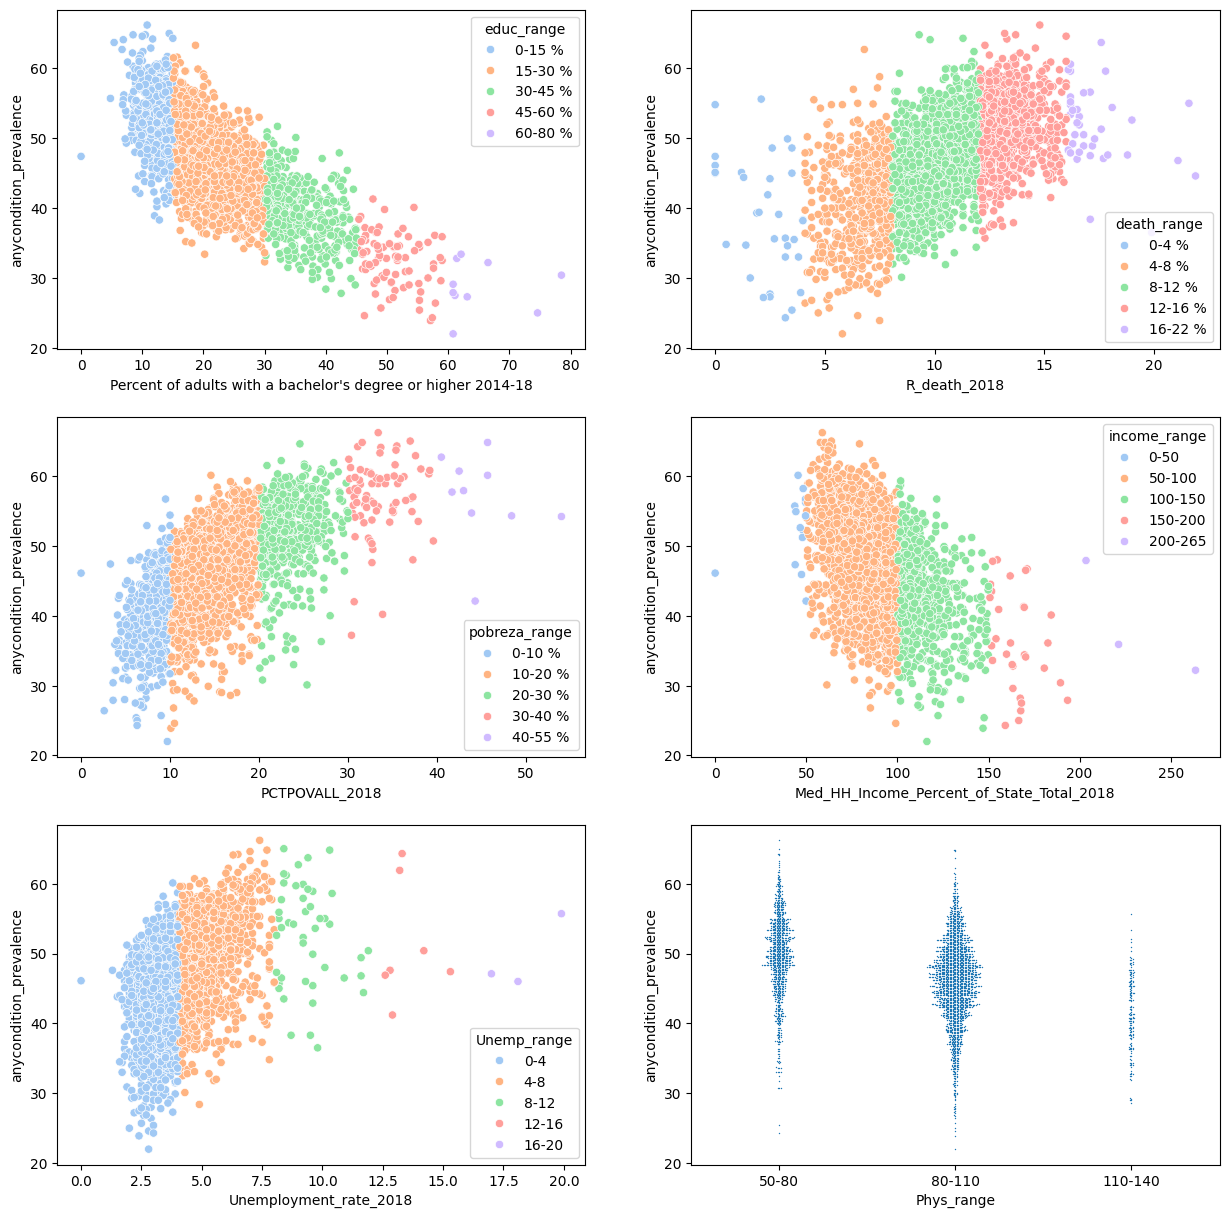

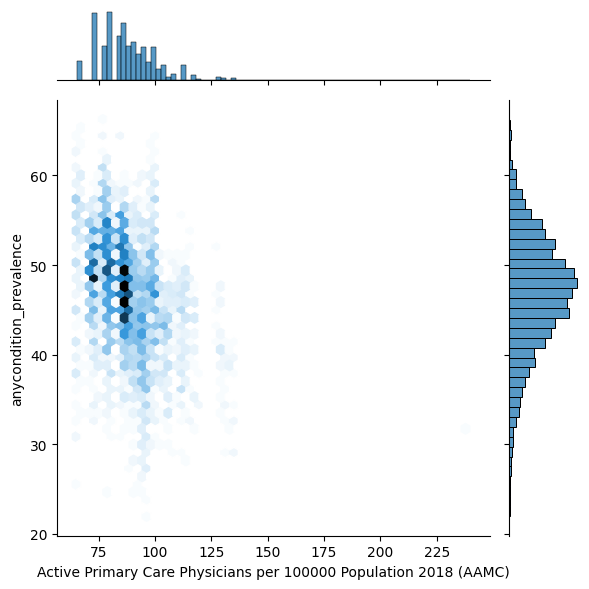

In [21]:
fig, axis = plt.subplots(3,2, figsize = (15, 15))

sns.scatterplot(ax = axis[0, 0], data = data_sel, y ='anycondition_prevalence', x="Percent of adults with a bachelor's degree or higher 2014-18", hue = "educ_range",palette='pastel')
sns.scatterplot(ax = axis[0, 1], data = data_sel, y = 'anycondition_prevalence',x='R_death_2018', hue = "death_range",palette='pastel')
sns.scatterplot(ax = axis[1, 0],data=data_sel,y='anycondition_prevalence',x='PCTPOVALL_2018', hue='pobreza_range',palette='pastel' )
sns.scatterplot(ax = axis[1,1],data=data_sel,y = 'anycondition_prevalence',x='Med_HH_Income_Percent_of_State_Total_2018',hue='income_range',palette='pastel' )
sns.scatterplot(ax = axis[2, 0],data=data_sel,y='anycondition_prevalence',x='Unemployment_rate_2018', hue='Unemp_range',palette='pastel' )
sns.swarmplot(ax = axis[2,1],data=data_sel,y = 'anycondition_prevalence',x='Phys_range', size=1)
sns.jointplot(x=df_dh['Active Primary Care Physicians per 100000 Population 2018 (AAMC)'], y=df_dh['anycondition_prevalence'], kind="hex")

plt.tight_layout()

plt.show()

se observa una relación clara entre ambas variables predictoras vs objetivo, en algunos casos la relacion es directa, al subir la variable predictora y sube la variable objetivo

Matriz de Correlación

In [22]:
var_corr=["Percent of adults with a bachelor's degree or higher 2014-18","R_death_2018","PCTPOVALL_2018",
          "Med_HH_Income_Percent_of_State_Total_2018", "Unemployment_rate_2018",
          "Active Primary Care Physicians per 100000 Population 2018 (AAMC)","anycondition_prevalence"]
data_corr=df_dh[var_corr]

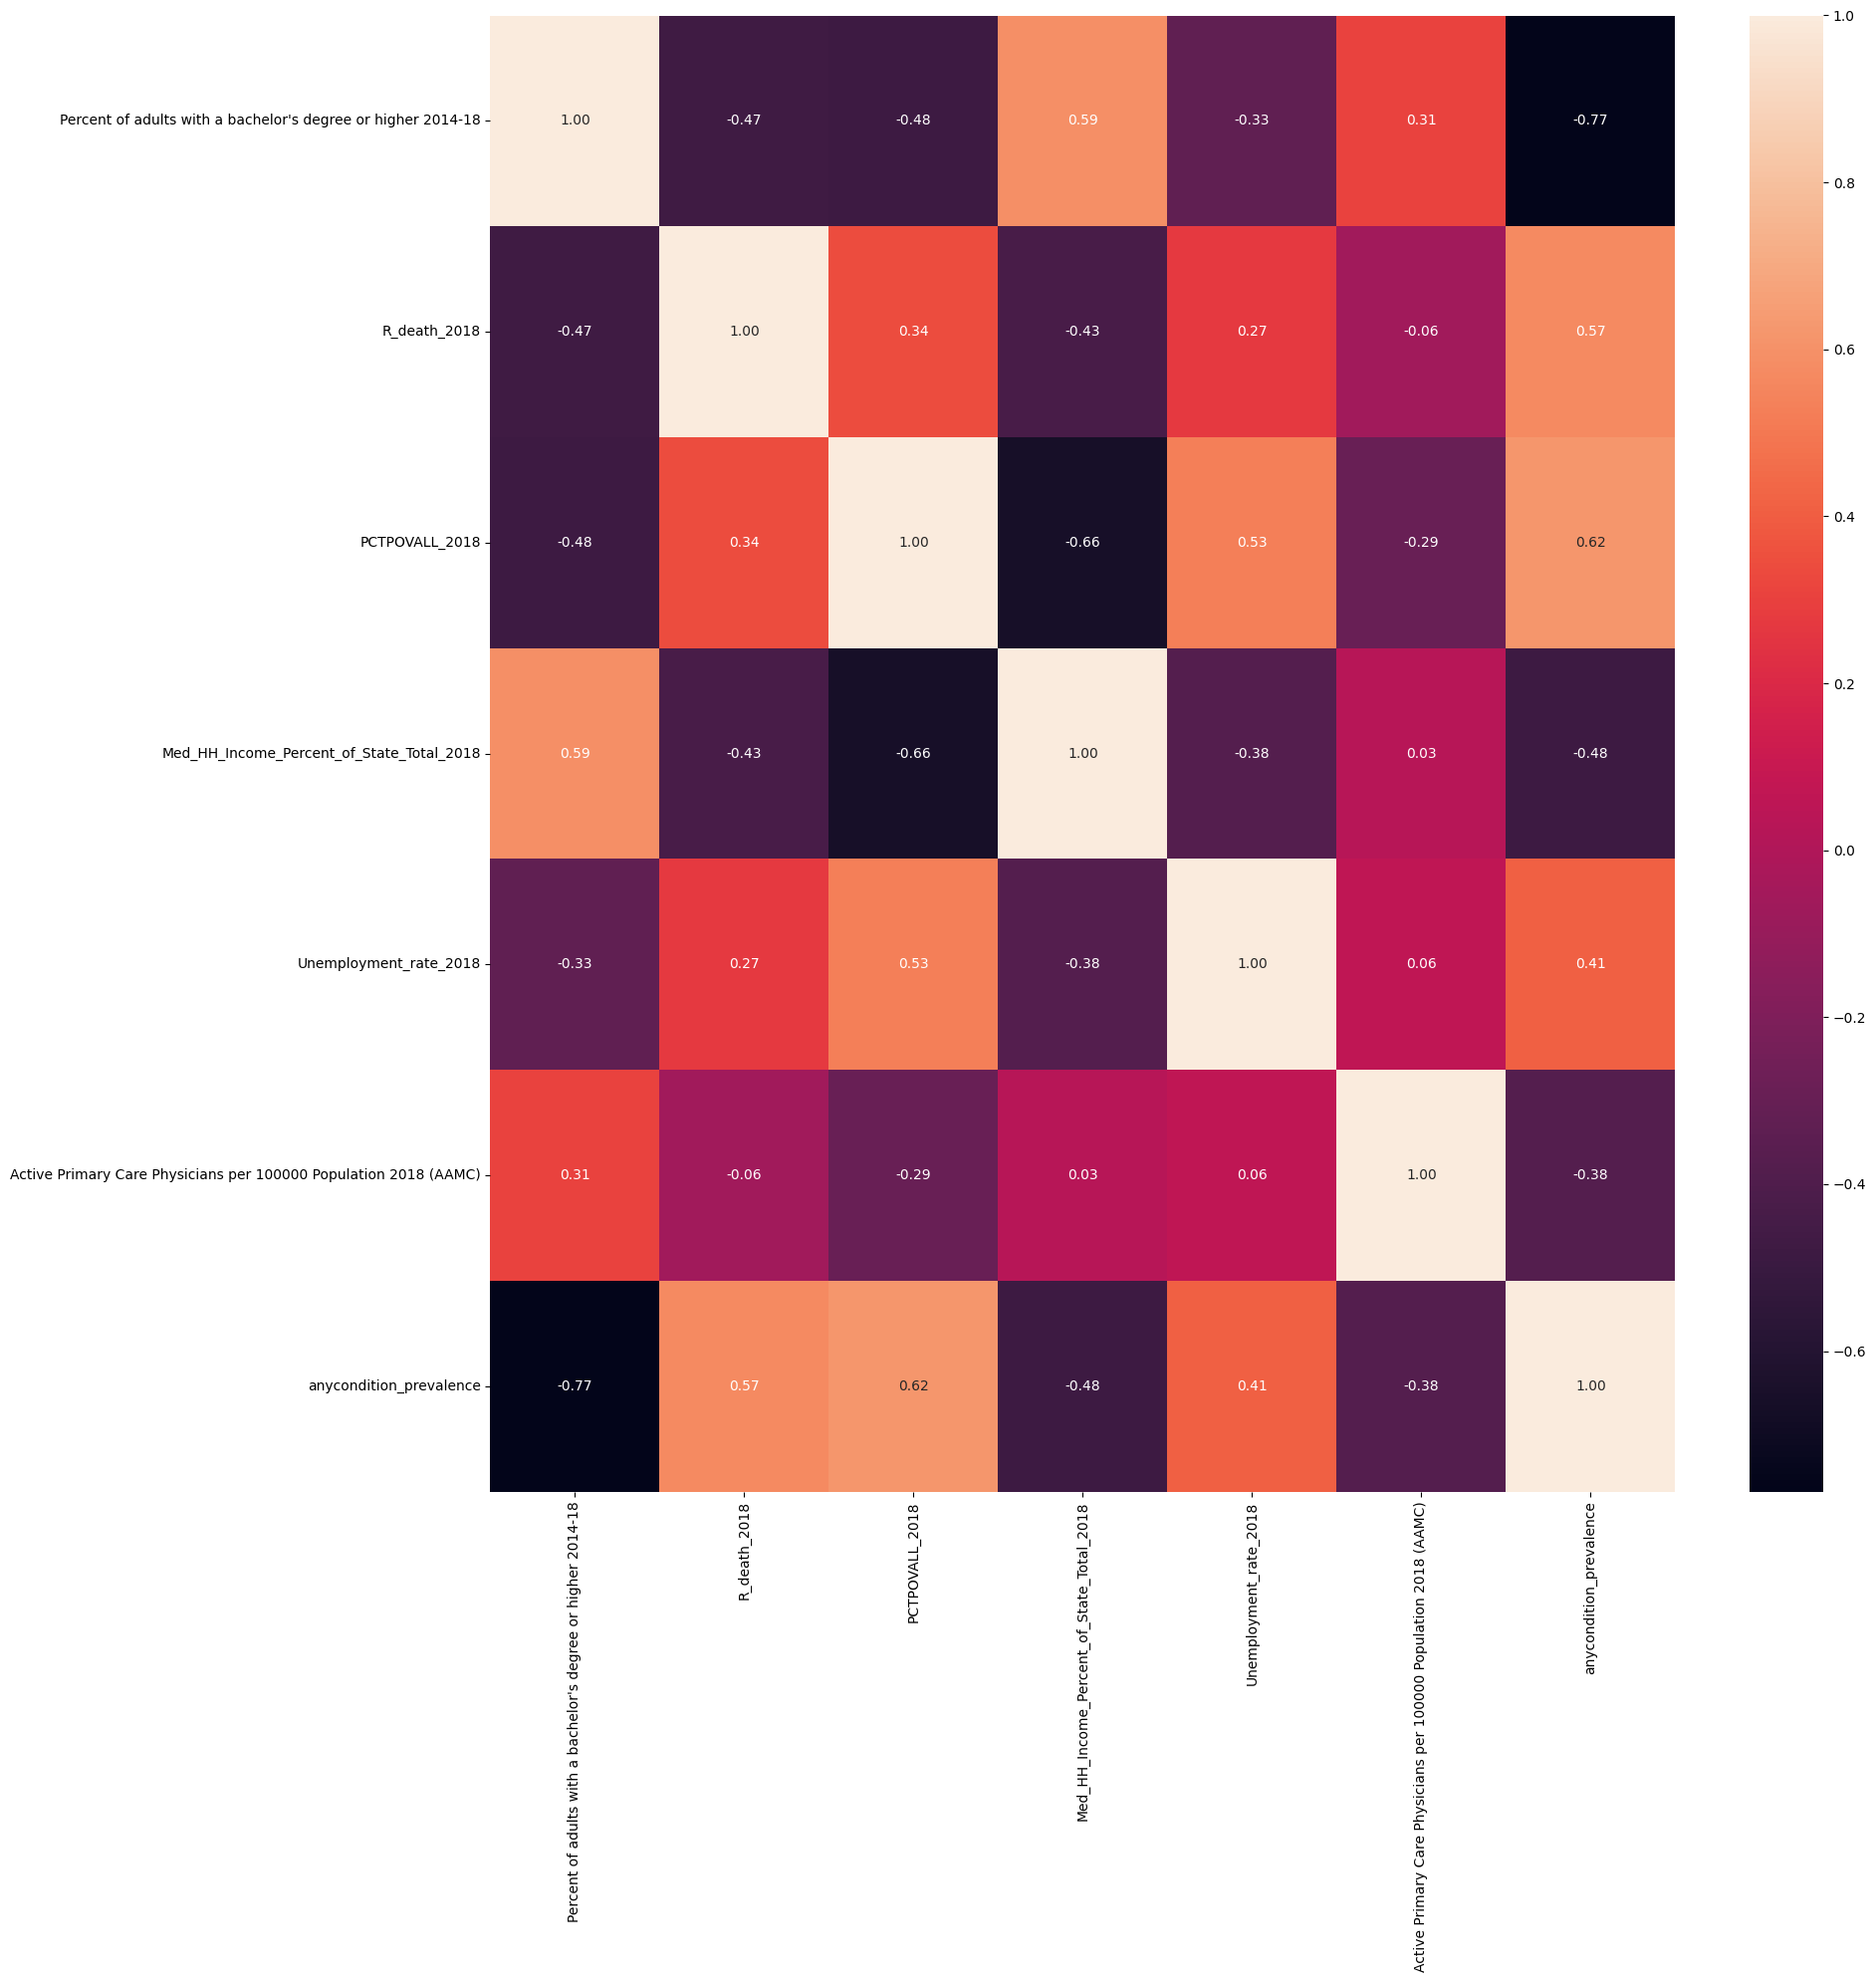

In [26]:
fig, axis = plt.subplots(figsize = (20,20))
matriz_corr=df_dh[var_corr].corr()
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

### Ingenieria de Características

Anáñisis de Outliers

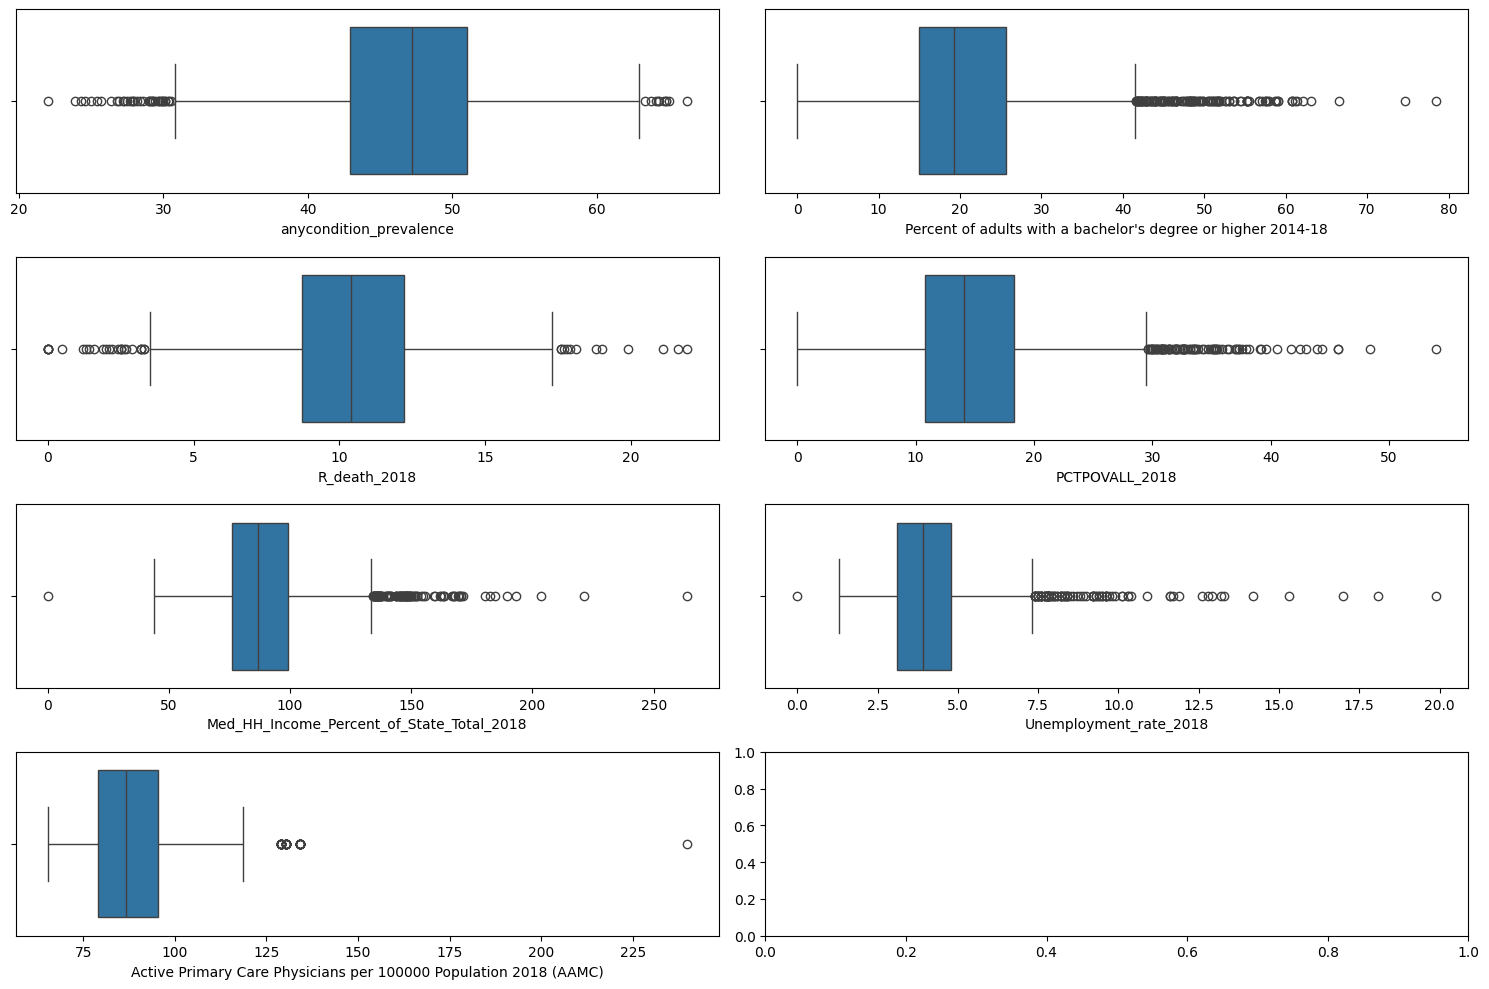

In [27]:
fig, axis = plt.subplots(4,2, figsize = (15, 10))

# Crear un histograma múltiple
sns.boxplot(ax = axis[0,0], data = data_corr, x = "anycondition_prevalence")
sns.boxplot(ax = axis[0,1], data = data_corr, x = "Percent of adults with a bachelor's degree or higher 2014-18")
sns.boxplot(ax = axis[1,0], data = data_corr, x = "R_death_2018")
sns.boxplot(ax = axis[1,1], data = data_corr, x = "PCTPOVALL_2018")
sns.boxplot(ax = axis[2,0], data = data_corr, x = "Med_HH_Income_Percent_of_State_Total_2018")
sns.boxplot(ax = axis[2,1], data = data_corr, x = "Unemployment_rate_2018")
sns.boxplot(ax = axis[3,0], data = data_corr, x = "Active Primary Care Physicians per 100000 Population 2018 (AAMC)")


# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()

In [28]:
educ=data_corr["Percent of adults with a bachelor's degree or higher 2014-18"].describe()
educ_iqr=educ['75%']-educ['25%']
p_lim_sup=educ['75%']+1.5*educ_iqr
p_lim_inf=educ['25%']-1.5*educ_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(educ_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 41.5 y -0.9, con un rango intercuartílico de 10.6


In [29]:
mort=data_corr["R_death_2018"].describe()
mort_iqr=mort['75%']-mort['25%']
p_lim_sup=mort['75%']+1.5*mort_iqr
p_lim_inf=mort['25%']-1.5*mort_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(mort_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 17.45 y 3.45, con un rango intercuartílico de 3.5


In [30]:
pobr=data_corr["PCTPOVALL_2018"].describe()
pobr_iqr=pobr['75%']-pobr['25%']
p_lim_sup=pobr['75%']+1.5*pobr_iqr
p_lim_inf=pobr['25%']-1.5*pobr_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(pobr_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 29.55 y -0.45, con un rango intercuartílico de 7.5


In [31]:
ingr=data_corr["Med_HH_Income_Percent_of_State_Total_2018"].describe()
ingr_iqr=ingr['75%']-ingr['25%']
p_lim_sup=ingr['75%']+1.5*ingr_iqr
p_lim_inf=ingr['25%']-1.5*ingr_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(ingr_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 133.7 y 41.7, con un rango intercuartílico de 23.0


In [32]:
phys=data_corr["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"].describe()
phys_iqr=phys['75%']-phys['25%']
p_lim_sup=phys['75%']+1.5*phys_iqr
p_lim_inf=phys['25%']-1.5*phys_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(phys_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 119.85 y 54.65, con un rango intercuartílico de 16.3


In [33]:
anyc=data_corr["anycondition_prevalence"].describe()
anyc_iqr=anyc['75%']-anyc['25%']
p_lim_sup=anyc['75%']+1.5*anyc_iqr
p_lim_inf=anyc['25%']-1.5*anyc_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(anyc_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 63.15 y 30.75, con un rango intercuartílico de 8.1


In [34]:
data_corr.drop(data_corr[data_corr["R_death_2018"]==0].index,inplace=True)
data_corr.drop(data_corr[data_corr["R_death_2018"]>17.45].index,inplace=True)
data_corr.drop(data_corr[data_corr["PCTPOVALL_2018"]>40].index,inplace=True)
data_corr.drop(data_corr[data_corr["Active Primary Care Physicians per 100000 Population 2018 (AAMC)"]>120].index,inplace=True)

/tmp/ipykernel_1131/3300619500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr.drop(data_corr[data_corr["R_death_2018"]==0].index,inplace=True)
/tmp/ipykernel_1131/3300619500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr.drop(data_corr[data_corr["R_death_2018"]>17.45].index,inplace=True)
/tmp/ipykernel_1131/3300619500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr.drop(data_corr[data_corr["P

### Construye un modelo de regresión

Separamos los datos de train y test

In [35]:
from sklearn.model_selection import train_test_split

var_num=["Percent of adults with a bachelor's degree or higher 2014-18","R_death_2018","PCTPOVALL_2018",
          "Med_HH_Income_Percent_of_State_Total_2018", "Unemployment_rate_2018",
          "Active Primary Care Physicians per 100000 Population 2018 (AAMC)"]
# Dividimos el conjunto de datos en muestras de train y test
X = data_corr.drop("anycondition_prevalence", axis = 1)[var_num]
y = data_corr["anycondition_prevalence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Percent of adults with a bachelor's degree or higher 2014-18,R_death_2018,PCTPOVALL_2018,Med_HH_Income_Percent_of_State_Total_2018,Unemployment_rate_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC)
2378,23.6,10.0,9.1,97.1,4.4,92.8
2103,14.1,9.8,10.3,95.9,4.1,93.7
1422,22.3,9.5,20.0,101.4,4.5,65.9
359,33.0,12.7,10.7,111.1,3.5,86.8
2548,14.8,8.0,14.1,86.7,3.6,72.9


Escalamos para el modelo

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = var_num)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = var_num)

X_train_scal.head()

,Percent of adults with a bachelor's degree or higher 2014-18,R_death_2018,PCTPOVALL_2018,Med_HH_Income_Percent_of_State_Total_2018,Unemployment_rate_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC)
2378,0.255088,0.546584,0.152778,0.242838,0.166667,0.516917
2103,0.126187,0.534161,0.186111,0.237381,0.150538,0.533835
1422,0.237449,0.515528,0.455556,0.262392,0.172043,0.011278
359,0.382632,0.714286,0.197222,0.306503,0.118280,0.404135
2548,0.135685,0.422360,0.291667,0.195543,0.123656,0.142857


Creamos y entrenamos el modelo

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scal, y_train)

LinearRegression()

In [39]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3, b4, b5, b6): {model.coef_}")

Intercepto (a): 40.316860115554086
Coeficientes (b1, b2, b3, b4, b5, b6): [-27.30106186  10.83189343  12.56037871  14.73982412   5.03433563
  -3.21545118]


Predicción del modelo

In [40]:
y_pred = model.predict(X_test_scal)
y_pred

array([50.00674214, 42.20754064, 49.74780214, 49.66673559, 46.77625281,
       48.46851625, 45.12514759, 45.40809762, 50.34523481, 46.2463282 ,
       49.6655968 , 32.84392994, 47.77055898, 48.75112109, 45.4889449 ,
       50.36668764, 46.71385805, 49.11354451, 53.83931169, 48.18920957,
       53.75616124, 52.9399736 , 51.19735042, 52.19648184, 47.65055291,
       29.17441851, 43.60461117, 46.81622485, 51.20590789, 53.82829273,
       47.64563722, 45.48866726, 52.35115882, 43.9454805 , 32.30120398,
       58.10203128, 45.60116858, 53.92689415, 42.79203879, 40.5903633 ,
       48.17976498, 39.22728676, 52.5606489 , 50.46165272, 52.94460238,
       42.22521337, 45.09047748, 51.15959401, 53.20475982, 54.92072545,
       47.31795899, 56.6887424 , 44.78842843, 41.88997707, 46.06159483,
       51.16367002, 57.45068154, 42.77751136, 47.29306406, 48.74439777,
       50.56299491, 56.83082462, 41.1096541 , 36.99156255, 45.99125505,
       54.80905838, 47.16922774, 51.21293581, 52.1766323 , 36.03

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 9.69447125375083
Coeficiente de determinación: 0.7672155706097952


### Optimiza el modelo de regresión anterior

In [47]:
from sklearn.linear_model import Lasso

def mod_lasso(alpha):
    lasso_model = Lasso(alpha = alpha, max_iter = 100, random_state=42)
    lasso_model.fit(X_train_scal, y_train)
    y_predlasso = lasso_model.predict(X_test_scal)
    return y_predlasso
results={}
for j in np.arange(0.0,0.1,0.001,dtype=float):
    j = round(j, 7)
    results[j]=r2_score(y_test, mod_lasso(j))
    print(f"alpha, Coeficiente de determinación: {j, r2_score(y_test, mod_lasso(j))}")

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+04, tolerance: 9.590e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skle

alpha, Coeficiente de determinación: (np.float64(0.0), 0.7672155706097952)
alpha, Coeficiente de determinación: (np.float64(0.001), 0.7670229572172707)
alpha, Coeficiente de determinación: (np.float64(0.002), 0.7667904394201339)
alpha, Coeficiente de determinación: (np.float64(0.003), 0.7665206671870354)
alpha, Coeficiente de determinación: (np.float64(0.004), 0.7662129984011186)
alpha, Coeficiente de determinación: (np.float64(0.005), 0.7658674330623834)
alpha, Coeficiente de determinación: (np.float64(0.006), 0.7654839711708296)
alpha, Coeficiente de determinación: (np.float64(0.007), 0.7650626127264574)
alpha, Coeficiente de determinación: (np.float64(0.008), 0.7646033577292668)
alpha, Coeficiente de determinación: (np.float64(0.009), 0.7641062061792576)
alpha, Coeficiente de determinación: (np.float64(0.01), 0.7635711580764302)
alpha, Coeficiente de determinación: (np.float64(0.011), 0.7629982134207843)
alpha, Coeficiente de determinación: (np.float64(0.012), 0.76238737221232)
alph